In [1]:
from tbparse import SummaryReader
import matplotlib.pylab as plt
import os
import numpy as np
import seaborn as sbn
sbn.set_style("darkgrid")

In [2]:
cifar_msd_rex_path = 'experiments/CIFAR10/ResNet18/final/pretrain_MSD/pretrained_MSD_REx_waterfall_lr_init_0.01/events.out.tfevents.1651824882.ng30703.narval.calcul.quebec.2893300.0'
cifar_msd_rex_reader = SummaryReader(cifar_msd_rex_path)
df_cifar_msd_rex = cifar_msd_rex_reader.scalars

In [3]:
mnist_rex_dir_path = 'experiments/MNIST/MLP/final/pretrain_std/REx_waterfall_lr_init_0.01'
mnist_rex_files = []
for file in os.listdir(mnist_rex_dir_path):
    if file.startswith('events'):
        mnist_rex_files.append(os.path.join(mnist_rex_dir_path, file))
df_mnist_rex = [SummaryReader(file_path).scalars for file_path in mnist_rex_files]
mnist_erm_dir_path = 'experiments/MNIST/MLP/final/pretrain_std/ERM_lr_init_0.01'
mnist_erm_files = []
for file in os.listdir(mnist_erm_dir_path):
    if file.startswith('events'):
        mnist_erm_files.append(os.path.join(mnist_erm_dir_path, file))
df_mnist_erm = [SummaryReader(file_path).scalars for file_path in mnist_erm_files]

In [4]:
cifar_msd_dir_path = 'experiments/CIFAR10/ResNet18/final/pretrain_MSD/train_MSD_lr_init_0.01'
cifar_msd_files = []
for file in os.listdir(cifar_msd_dir_path):
    if file.startswith('events'):
        cifar_msd_files.append(os.path.join(cifar_msd_dir_path, file))
df_cifar_msd = [SummaryReader(file_path).scalars for file_path in cifar_msd_files]

In [23]:
set(df_cifar_msd[3]['tag'])
#set(df_cifar_msd_rex['tag'])

{'ERM_term_train',
 'ERM_term_validation',
 'Learning_rate',
 'Momentum',
 'Training_accuracy_MSD',
 'Training_loss',
 'Training_loss_MSD',
 'Validation_accuracy_AutoAttack_unseen',
 'Validation_accuracy_CW_base',
 'Validation_accuracy_CW_unseen',
 'Validation_accuracy_Deepfool_base',
 'Validation_accuracy_Deepfool_unseen',
 'Validation_accuracy_PGD_L1',
 'Validation_accuracy_PGD_L2',
 'Validation_accuracy_PGD_Linf',
 'Validation_accuracy_PGD_Linf_unseen',
 'Validation_accuracy_clean',
 'Validation_loss',
 'Validation_loss_Autoattack_unseen',
 'Validation_loss_CW_base',
 'Validation_loss_CW_unseen',
 'Validation_loss_Deepfool_base',
 'Validation_loss_Deepfool_unseen',
 'Validation_loss_PGD_L1',
 'Validation_loss_PGD_L2',
 'Validation_loss_PGD_Linf',
 'Validation_loss_PGD_Linf_unseen',
 'Validation_loss_clean',
 'unseen_ERM_term_validation'}

In [7]:
seen_keys_cifar = ['Validation_accuracy_PGD_L2', 'Validation_accuracy_PGD_Linf']
unseen_keys_cifar = ['Validation_accuracy_AutoAttack_unseen', 'Validation_accuracy_CW_base']
seen_keys_mnist = ['Validation_accuracy_PGD', 'Validation_accuracy_CW']
unseen_keys_mnist = ['Validation_accuracy_AutoAttack_unseen', 'Validation_accuracy_Deepfool_unseen']

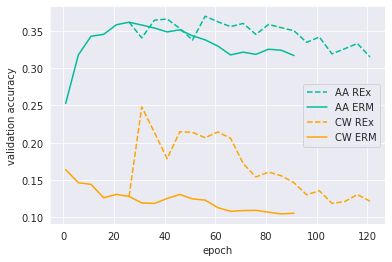

In [135]:
##################
seen_stat = 'unseen'
dataset = 'cifar'
##################

key_list = globals()[seen_stat + '_keys_' + dataset]
fig_name = seen_stat + '_' + dataset + '_test.png'
if dataset == 'mnist':
    df_no_rex = df_mnist_erm
    df_rex = df_mnist_rex
    if seen_stat == 'seen':
        atk1 = 'PGD'
        atk2 = 'CW'
    if seen_stat == 'unseen':
        atk1 = 'AA'
        atk2 = 'Deepfool'
else:
    df_no_rex = df_cifar_msd
    df_rex = [df_cifar_msd_rex]
    if seen_stat == 'seen':
        atk1 = 'PGD L2'
        atk2 = 'PGD Linf'
    if seen_stat == 'unseen':
        atk1 = 'AA'
        atk2 = 'CW'
        
for i, key in enumerate(key_list):
    x_no_rex = []
    y_no_rex = []
    for j, df in enumerate(df_no_rex):
        if 'tag' not in df.keys():
            continue
        y_no_rex += list(df[df['tag'] == key]['value'])
        x_no_rex += list(df[df['tag'] == key]['step'])
    x_no_rex = np.array(x_no_rex)
    y_no_rex = np.array(y_no_rex)
    x_order_no_rex = np.argsort(x_no_rex)
    x_no_rex = x_no_rex[x_order_no_rex]
    y_no_rex = y_no_rex[x_order_no_rex]
    
    x_rex = []
    y_rex = []
    for j, df in enumerate(df_rex):
        if 'tag' not in df.keys():
            continue
        y_rex += list(df[df['tag'] == key]['value'])
        x_rex += list(df[df['tag'] == key]['step'])
        #break
    x_rex = np.array(x_rex)
    y_rex = np.array(y_rex)
    x_order_rex = np.argsort(x_rex)
    x_rex = x_rex[x_order_rex]
    y_rex = y_rex[x_order_rex]
    
    first_rex_step = x_rex[0]
    prev_steps = x_no_rex[x_no_rex < first_rex_step]
    if prev_steps.size>0:
        last_no_rex_step = max(prev_steps)
        last_no_rex_idx = list(x_no_rex).index(last_no_rex_step)
        x_rex = np.array([last_no_rex_step] + list(x_rex))
        y_rex = np.array([y_no_rex[last_no_rex_idx]] + list(y_rex))
    else:
        x_rex = np.array([x_rex[0]] + list(x_rex))
        y_rex = np.array([y_no_rex[0]] + list(y_rex))
    
    
    color_no_rex = '#00BD99' if i==0 else '#FFA400'
    color_rex = '#00BD99' if i==0 else '#FFA400'
    attack = atk1 if i==0 else atk2
    
    plt.gcf().set_facecolor('white')
    plt.plot(x_rex, y_rex, color=color_rex, linestyle='dashed', label=attack + ' REx')
    plt.plot(x_no_rex, y_no_rex, color=color_no_rex, label=attack + ' ERM')
plt.xlabel('epoch')
plt.ylabel('validation accuracy')
plt.legend() #bbox_to_anchor=(0.65, 0.46))
plt.savefig(fig_name)
plt.show()
plt.close()

{'Training_loss', 'Training_loss_PGD_L2_std', 'Validation_accuracy_PGD_L1_std', 'Validation_unseen_ERM_loss', 'Validation_loss_PGD_L1_std', 'Validation_loss_Deepfool_base', 'Validation_accuracy_CW_mod', 'Validation_seen_ERM_loss', 'Validation_accuracy_CW_base', 'Validation_accuracy_PGD_Linf_mod', 'Validation_loss_PGD_Linf_std', 'Validation_loss_CW_base', 'Validation_unseen_accuracy', 'Learning_rate', 'Validation_accuracy_Deepfool_mod', 'Validation_accuracy_PGD_L2_std', 'Validation_loss_CW_mod', 'Validation_seen_worst_case_accuracy', 'Validation_loss_PGD_L2_std', 'Validation_unseen_variance_term', 'Validation_accuracy_clean', 'Weight_decay', 'ERM_term_validation', 'Validation_seen_accuracy', 'ERM_term_train', 'Validation_accuracy_PGD_Linf_std', 'Momentum', 'Validation_loss_clean', 'Validation_loss_Autoattack', 'Validation_loss', 'Validation_accuracy_Autoattack', 'Validation_loss_PGD_Linf_mod', 'Validation_seen_variance_term', 'Validation_loss_Deepfool_mod', 'Training_accuracy_PGD_L2_std

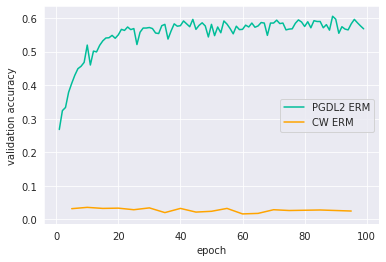

In [21]:
## Generate figures for CW_2 and PGD L2 perf tradeoff when training on PGD L2
# clear memory
from IPython import get_ipython
get_ipython().magic('reset -sf') 

#### Get CW2 vs PGD L2 figures from PGD L2 
from tbparse import SummaryReader
import matplotlib.pylab as plt
import os
import numpy as np
import seaborn as sbn
sbn.set_style("darkgrid")

cifar_msd_dir_path = 'experiments/CIFAR10/ResNet18/train/wd/PGD_L2_ERM'
cifar_msd_files = []
for file in os.listdir(cifar_msd_dir_path):
    if file.startswith('events'):
        cifar_msd_files.append(os.path.join(cifar_msd_dir_path, file))
df_cifar_msd = [SummaryReader(file_path).scalars for file_path in cifar_msd_files]

print(set(df_cifar_msd[1]['tag']))

##################
seen_stat = 'unseen'
dataset = 'cifar'
##################

key_list = ['Validation_accuracy_PGD_L2_std', 'Validation_accuracy_CW_base']

fig_name = 'L2_AT_L2_vs_CW_accs.png'

# Following tensorboard's smoothing implementation, taken from https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return np.array(smoothed)

if dataset == 'mnist':
    df_raw = df_mnist_erm
    df_rex_raw = df_mnist_rex
    if seen_stat == 'seen':
        atk1 = 'PGD'
        atk2 = 'CW'
    if seen_stat == 'unseen':
        atk1 = 'AA'
        atk2 = 'Deepfool'
else:
    df_raw = df_cifar_msd
    # df_rex = [df_cifar_msd_rex]
    atk1 = 'PGD L2'
    atk2 = 'CW'

x_data = {}
y_data = {}        
for i, key in enumerate(key_list):
    x = []
    y = []
    for j, df in enumerate(df_raw):
        if 'tag' not in df.keys():
            continue
        y += list(df[df['tag'] == key]['value'])
        x += list(df[df['tag'] == key]['step'])
    x = np.array(x)
    y = np.array(y)
    x_order = np.argsort(x)
    x = x[x_order]
    y = y[x_order]

    x_data[key] = x
    y_data[key] = y
    
    

color_1 = '#00BD99'
color_2 = '#FFA400'

def get_attack_from_key(key):
    split_key = key.split('_')
    attack_name = ""
    for word in split_key:
        if word in ['Validation', 'accuracy', 'Training', 'std', 'base']:
            continue
        else:
            attack_name += word + " "
    return attack_name

y_data[key_list[0]] = smooth(y_data[key_list[0]], 0.7)
y_data[key_list[1]] = smooth(y_data[key_list[1]], 0.7)

fig, ax = plt.subplots()
# fig.gcf().set_facecolor('white')
# plt.plot(x_rex, y_rex, color=color_rex, linestyle='dashed', label=attack + ' REx')
mask_1 = [x < 60 for x in x_data[key_list[0]]]
mask_2 = [x < 60 for x in x_data[key_list[1]]]
ax.plot(x_data[key_list[0]][mask_1], y_data[key_list[0]][mask_1], color=color_1, label=get_attack_from_key(key_list[0]) + ' ERM')
ax_right = ax.twinx()
ax_right.plot(x_data[key_list[1]][mask_2], y_data[key_list[1]][mask_2], color=color_2, label=get_attack_from_key(key_list[1])+"L2" + ' ERM')

ax.set_xlabel('epoch')
ax.set_ylabel('PGD L2 validation accuracy')
ax_right.set_ylabel('CW L2 validation accuracy')
fig.legend() #bbox_to_anchor=(0.65, 0.46))
fig.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

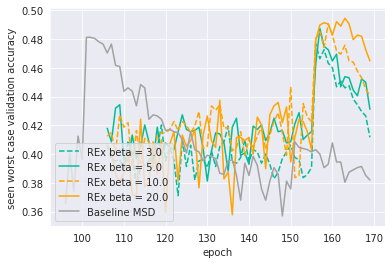

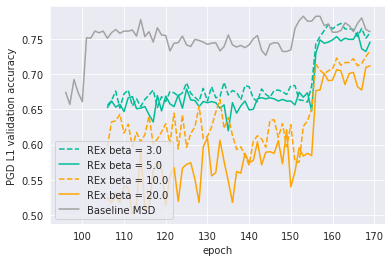

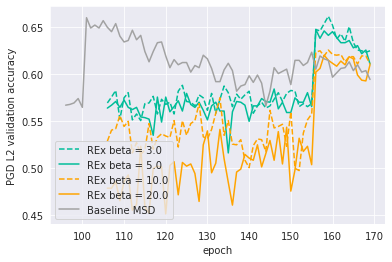

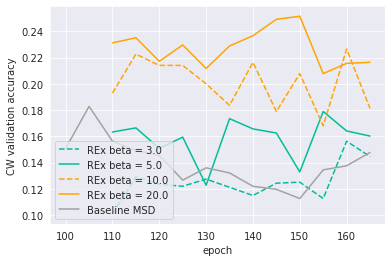

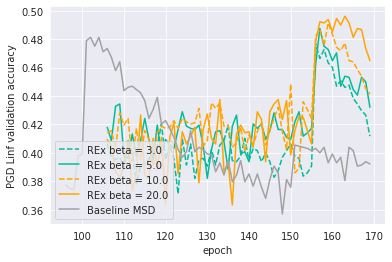

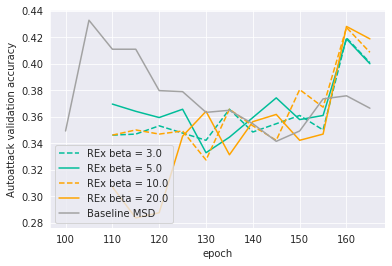

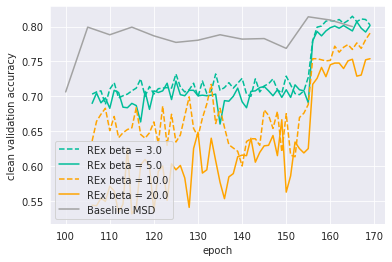

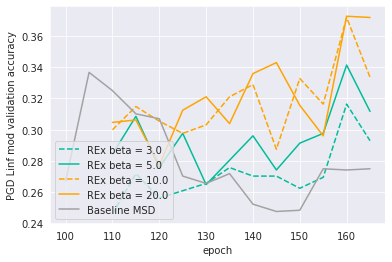

In [6]:
## Generate figures for varying values of beta
# clear memory
from IPython import get_ipython
get_ipython().magic('reset -sf') 

#### Get CW2 vs PGD L2 figures from PGD L2 
from tbparse import SummaryReader
import matplotlib.pylab as plt
import os
import numpy as np
import seaborn as sbn
sbn.set_style("darkgrid")

def get_attack_from_key(key, output_separator=" "):
    split_key = key.split('_')
    attack_name = ""
    for i, word in enumerate(split_key):
        if word in ['Validation', 'accuracy', 'Training', 'std', 'base']:
            continue
        else:
            attack_name += word + output_separator
    # no sep on last output
    if attack_name[-1] == output_separator:
        attack_name = attack_name[:-1]
    return attack_name


def get_beta_value(path):
    split_by_slash = path.split('/')
    folder_name = split_by_slash[-1]
    # Folder name is always "MSD_REx_beta" so the value starts at the 12th index of the string
    return folder_name[12:]

pathes = ["experiments/CIFAR10/ResNet18/train/wd/MSD_REx_beta3.0", "experiments/CIFAR10/ResNet18/train/wd/MSD_REx_beta5.0", "experiments/CIFAR10/ResNet18/train/wd/MSD_REx_beta10.0", "experiments/CIFAR10/ResNet18/train/wd/MSD_REx_beta20.0", "experiments/CIFAR10/ResNet18/train/wd/MSD_ERM"]
fig_name = 'Varying_beta_seen_worst_case.png'
key_list = ['Validation_seen_worst_case_accuracy', 'Validation_accuracy_PGD_L1_std', 'Validation_accuracy_PGD_L2_std', 
            'Validation_accuracy_CW_base', 'Validation_accuracy_PGD_Linf_std', 'Validation_accuracy_Autoattack', 
            'Validation_accuracy_clean', 'Validation_accuracy_PGD_Linf_mod']
key = key_list[0]
colours = ['#00BD99', '#FFA400', '#A2A2A2']

for key in key_list:
    plt.clf()
    fig_name = "figures/varying_beta/Varying_beta_" + get_attack_from_key(key, output_separator="_")
    for i, path in enumerate(pathes):
        cifar_msd_dir_path = path
        cifar_msd_files = []
        for file in os.listdir(cifar_msd_dir_path):
            if file.startswith('events'):
                cifar_msd_files.append(os.path.join(cifar_msd_dir_path, file))
        df_cifar_msd = [SummaryReader(file_path).scalars for file_path in cifar_msd_files]

        # print(set(df_cifar_msd[1]['tag']))

        # ##################
        # seen_stat = 'unseen'
        # dataset = 'cifar'
        # ##################




        df = df_cifar_msd

        x_data = {}
        y_data = {}        

        x = []
        y = []
        for j, df in enumerate(df):
            if 'tag' not in df.keys():
                continue
            y += list(df[df['tag'] == key]['value'])
            x += list(df[df['tag'] == key]['step'])
        x = np.array(x)
        y = np.array(y)
        x_order = np.argsort(x)
        x = x[x_order]
        y = y[x_order]

        x_data[path] = x
        y_data[path] = y



        # Only keep 1 entry per x
        consecutive_duplicates_indices = np.insert(np.diff(x_data[path]).astype(bool), 0, True)
        x_data[path] = x_data[path][consecutive_duplicates_indices]
        y_data[path] = y_data[path][consecutive_duplicates_indices]


        plt.gcf().set_facecolor('white')
        mask = [(x < 170 and x > 95) for x in x_data[path]]
        if i < 4:
            if i % 2:
                plt.plot(x_data[path][mask], y_data[path][mask], color=colours[i//2], label="REx beta = " + get_beta_value(path))
            else:
                plt.plot(x_data[path][mask], y_data[path][mask], color=colours[i//2], linestyle='dashed', label="REx beta = " + get_beta_value(path))
        else:
            plt.plot(x_data[path][mask], y_data[path][mask], color=colours[-1], label="Baseline MSD")
    # mask_1 = [x < 100 for x in x_data[key_list[0]]]
    # mask_2 = [x < 100 for x in x_data[key_list[1]]]
    # fig.plot(x_data[key_list[0]][mask_1], y_data[key_list[0]][mask_1], color=color_1, label=get_attack_from_key(key_list[0]) + ' ERM')
    # fig.plot(x_data[key_list[1]][mask_2], y_data[key_list[1]][mask_2], color=color_2, label=get_attack_from_key(key_list[1])+"L2" + ' ERM')

    plt.xlabel('epoch')
    plt.ylabel(get_attack_from_key(key) + ' validation accuracy')
    plt.legend(loc='lower left') #bbox_to_anchor=(0.65, 0.46))
    plt.savefig(fig_name)
    plt.show()
    plt.close()

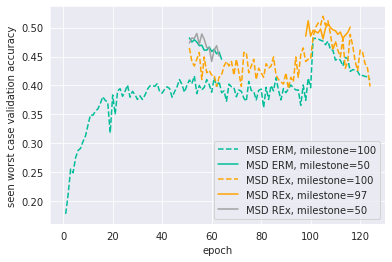

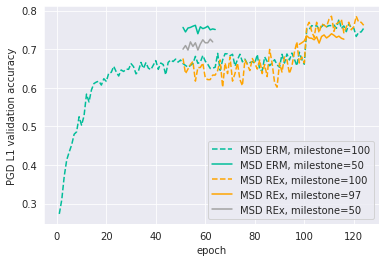

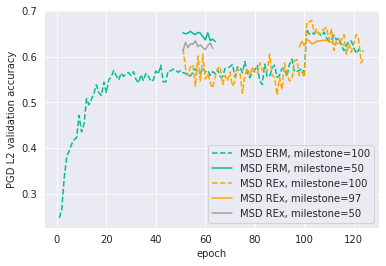

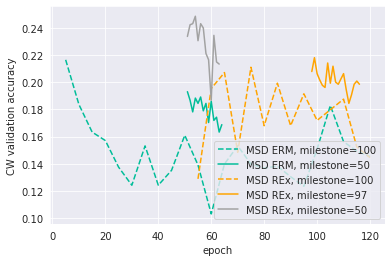

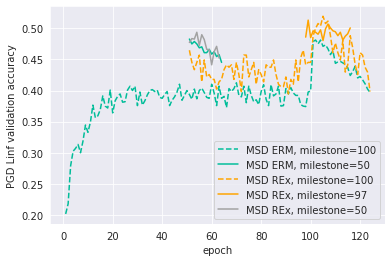

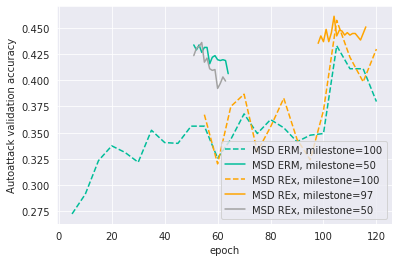

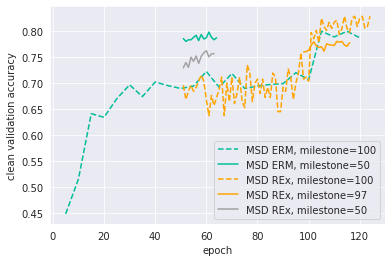

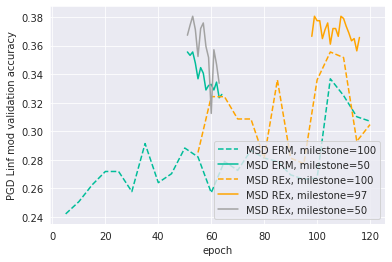

In [7]:
## Generate figures for varying values CIFAR10 optimised MSD lr scheduler milestones
# clear memory
from IPython import get_ipython
get_ipython().magic('reset -sf') 

#### Get CW2 vs PGD L2 figures from PGD L2 
from tbparse import SummaryReader
import matplotlib.pylab as plt
import os
import numpy as np
import seaborn as sbn
sbn.set_style("darkgrid")

def get_attack_from_key(key, output_separator=" "):
    split_key = key.split('_')
    attack_name = ""
    for i, word in enumerate(split_key):
        if word in ['Validation', 'accuracy', 'Training', 'std', 'base']:
            continue
        else:
            attack_name += word + output_separator
    # no sep on last output
    if attack_name[-1] == output_separator:
        attack_name = attack_name[:-1]
    return attack_name


def get_beta_value(path):
    split_by_slash = path.split('/')
    folder_name = split_by_slash[-1]
    # Folder name is always "MSD_REx_beta" so the value starts at the 12th index of the string
    return folder_name[12:]

MSD_pathes = ["experiments/CIFAR10/ResNet18/train/wd/MSD_ERM", "experiments/CIFAR10/ResNet18/train/wd/early_lr_drop_MSD_ERM"] 
MSD_REx_pathes = ["experiments/CIFAR10/ResNet18/train/wd/early_MSD_REx_beta10.0", "experiments/CIFAR10/ResNet18/train/wd/early_MSD_decay_97early_lr_drop_MSD_REx_beta10", 
                  "experiments/CIFAR10/ResNet18/train/wd/early_lr_drop_MSD_REx_beta10.0"]
pathes = MSD_pathes + MSD_REx_pathes
labels = ["MSD ERM, milestone=100", "MSD ERM, milestone=50", "MSD REx, milestone=100", "MSD REx, milestone=97", "MSD REx, milestone=50"]
# fig_name = 'Varying_beta_seen_worst_case.png'
key_list = ['Validation_seen_worst_case_accuracy', 'Validation_accuracy_PGD_L1_std', 'Validation_accuracy_PGD_L2_std', 
            'Validation_accuracy_CW_base', 'Validation_accuracy_PGD_Linf_std', 'Validation_accuracy_Autoattack', 
            'Validation_accuracy_clean', 'Validation_accuracy_PGD_Linf_mod']
key = key_list[0]
colours = ['#00BD99', '#FFA400', '#A2A2A2']

for key in key_list:
    plt.clf()
    fig_name = "figures/when_to_early_stop_MSD/" + get_attack_from_key(key, output_separator="_")
    for i, path in enumerate(pathes):
        cifar_msd_dir_path = path
        cifar_msd_files = []
        for file in os.listdir(cifar_msd_dir_path):
            if file.startswith('events'):
                cifar_msd_files.append(os.path.join(cifar_msd_dir_path, file))
        df_cifar_msd = [SummaryReader(file_path).scalars for file_path in cifar_msd_files]

        # print(set(df_cifar_msd[1]['tag']))

        # ##################
        # seen_stat = 'unseen'
        # dataset = 'cifar'
        # ##################




        df = df_cifar_msd

        x_data = {}
        y_data = {}        

        x = []
        y = []
        for j, df in enumerate(df):
            if 'tag' not in df.keys():
                continue
            y += list(df[df['tag'] == key]['value'])
            x += list(df[df['tag'] == key]['step'])
        x = np.array(x)
        y = np.array(y)
        x_order = np.argsort(x)
        x = x[x_order]
        y = y[x_order]

        x_data[path] = x
        y_data[path] = y



        # Only keep 1 entry per x
        consecutive_duplicates_indices = np.insert(np.diff(x_data[path]).astype(bool), 0, True)
        x_data[path] = x_data[path][consecutive_duplicates_indices]
        y_data[path] = y_data[path][consecutive_duplicates_indices]






        plt.gcf().set_facecolor('white')
        mask = [(x < 125) for x in x_data[path]]
        if i < 4:
            if i % 2:
                plt.plot(x_data[path][mask], y_data[path][mask], color=colours[i//2], label=labels[i])
            else:
                plt.plot(x_data[path][mask], y_data[path][mask], color=colours[i//2], linestyle='dashed', label=labels[i])
        else:
            plt.plot(x_data[path][mask], y_data[path][mask], color=colours[-1], label=labels[i])
    # mask_1 = [x < 100 for x in x_data[key_list[0]]]
    # mask_2 = [x < 100 for x in x_data[key_list[1]]]
    # fig.plot(x_data[key_list[0]][mask_1], y_data[key_list[0]][mask_1], color=color_1, label=get_attack_from_key(key_list[0]) + ' ERM')
    # fig.plot(x_data[key_list[1]][mask_2], y_data[key_list[1]][mask_2], color=color_2, label=get_attack_from_key(key_list[1])+"L2" + ' ERM')

    plt.xlabel('epoch')
    plt.ylabel(get_attack_from_key(key) + ' validation accuracy')
    plt.legend(loc='lower right') #bbox_to_anchor=(0.65, 0.46))
    plt.savefig(fig_name)
    plt.show()
    plt.close()

In [ ]:
## Generate figures for varying values CIFAR10 optimised Avg var lr scheduler milestones
# clear memory
from IPython import get_ipython
get_ipython().magic('reset -sf') 

#### Get CW2 vs PGD L2 figures from PGD L2 
from tbparse import SummaryReader
import matplotlib.pylab as plt
import os
import numpy as np
import seaborn as sbn
sbn.set_style("darkgrid")

def get_attack_from_key(key, output_separator=" "):
    split_key = key.split('_')
    attack_name = ""
    for i, word in enumerate(split_key):
        if word in ['Validation', 'accuracy', 'Training', 'std', 'base']:
            continue
        else:
            attack_name += word + output_separator
    # no sep on last output
    if attack_name[-1] == output_separator:
        attack_name = attack_name[:-1]
    return attack_name


def get_beta_value(path):
    split_by_slash = path.split('/')
    folder_name = split_by_slash[-1]
    # Folder name is always "MSD_REx_beta" so the value starts at the 12th index of the string
    return folder_name[12:]

Avg_var_pathes = ["experiments/CIFAR10/ResNet18/train/wd/var_ERM"] 
Avg_var_REx_pathes = ["experiments/CIFAR10/ResNet18/train/wd/var_REx_beta10.0"]
pathes = Avg_var_pathes + Avg_var_REx_pathes
labels = ["Avg ERM, milestone=100", "Avg REx, milestone=100"]
# fig_name = 'Varying_beta_seen_worst_case.png'
key_list = ['Validation_seen_worst_case_accuracy', 'Validation_accuracy_PGD_L1_std', 'Validation_accuracy_PGD_L2_std', 
            'Validation_accuracy_CW_base', 'Validation_accuracy_PGD_Linf_std', 'Validation_accuracy_Autoattack', 
            'Validation_accuracy_clean', 'Validation_accuracy_PGD_Linf_mod']
key = key_list[0]
colours = ['#00BD99', '#FFA400', '#A2A2A2']

for key in key_list:
    plt.clf()
    fig_name = "figures/when_to_early_stop_Avg/" + get_attack_from_key(key, output_separator="_")
    for i, path in enumerate(pathes):
        cifar_msd_dir_path = path
        cifar_msd_files = []
        for file in os.listdir(cifar_msd_dir_path):
            if file.startswith('events'):
                cifar_msd_files.append(os.path.join(cifar_msd_dir_path, file))
        df_cifar_msd = [SummaryReader(file_path).scalars for file_path in cifar_msd_files]

        # print(set(df_cifar_msd[1]['tag']))

        # ##################
        # seen_stat = 'unseen'
        # dataset = 'cifar'
        # ##################




        df = df_cifar_msd

        x_data = {}
        y_data = {}        

        x = []
        y = []
        for j, df in enumerate(df):
            if 'tag' not in df.keys():
                continue
            y += list(df[df['tag'] == key]['value'])
            x += list(df[df['tag'] == key]['step'])
        x = np.array(x)
        y = np.array(y)
        x_order = np.argsort(x)
        x = x[x_order]
        y = y[x_order]

        x_data[path] = x
        y_data[path] = y



        # Only keep 1 entry per x
        consecutive_duplicates_indices = np.insert(np.diff(x_data[path]).astype(bool), 0, True)
        x_data[path] = x_data[path][consecutive_duplicates_indices]
        y_data[path] = y_data[path][consecutive_duplicates_indices]





        plt.gcf().set_facecolor('white')
        mask = [(x < 125) for x in x_data[path]]
        plt.plot(x_data[path][mask], y_data[path][mask], color=colours[i], label=labels[i])
    # mask_1 = [x < 100 for x in x_data[key_list[0]]]
    # mask_2 = [x < 100 for x in x_data[key_list[1]]]
    # fig.plot(x_data[key_list[0]][mask_1], y_data[key_list[0]][mask_1], color=color_1, label=get_attack_from_key(key_list[0]) + ' ERM')
    # fig.plot(x_data[key_list[1]][mask_2], y_data[key_list[1]][mask_2], color=color_2, label=get_attack_from_key(key_list[1])+"L2" + ' ERM')

    plt.xlabel('epoch')
    plt.ylabel(get_attack_from_key(key) + ' validation accuracy')
    plt.legend(loc='lower right') #bbox_to_anchor=(0.65, 0.46))
    plt.savefig(fig_name)
    plt.show()
    plt.close()